In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import os
import pandas as pd
import seaborn as sns
from IPython.display import display
import numpy as np
import re
import json


pd.options.display.max_columns = None
%matplotlib inline

# 한글 폰트
plt.rcParams['font.family'] = 'NanumGothic'
# 마이너스 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔 고딕의 경로
font_prop = fm.FontProperties(fname=font_path).get_name()

# 한글 폰트 설정}
matplotlib.rcParams['font.family'] = font_prop

# 전역 팔레트 설정 (예: 'Set2' 팔레트 사용)
sns.set_palette('Set2')


In [3]:
# 데이터 불러오기
regular_season = pd.read_csv('../datas/Regular_Season_Batter.csv')

'''
포지션, 타수별 OPS의 관계를 알아보자
'''

regular_season['position']


0       내야수(우투우타)
1       내야수(우투좌타)
2       내야수(우투좌타)
3       내야수(우투좌타)
4       내야수(우투좌타)
          ...    
2449    내야수(우투양타)
2450    내야수(우투양타)
2451    내야수(우투양타)
2452    내야수(우투양타)
2453    내야수(우투양타)
Name: position, Length: 2454, dtype: object

In [4]:
# 포지션, 타수 분리
regular_season['pos'] = regular_season['position'].apply(lambda x: x.split('(')[0])
regular_season['hand'] = regular_season['position'].apply(lambda x: x.split('(')[1].replace(')', '')[2:])

regular_season.to_csv('../datas/Regular_Season_Batter.csv', encoding='utf-8-sig', index=False)
regular_season[['pos', 'hand']]


,pos,hand
0,내야수,우타
1,내야수,좌타
2,내야수,좌타
3,내야수,좌타
4,내야수,좌타
...,...,...
2449,내야수,양타
2450,내야수,양타
2451,내야수,양타
2452,내야수,양타


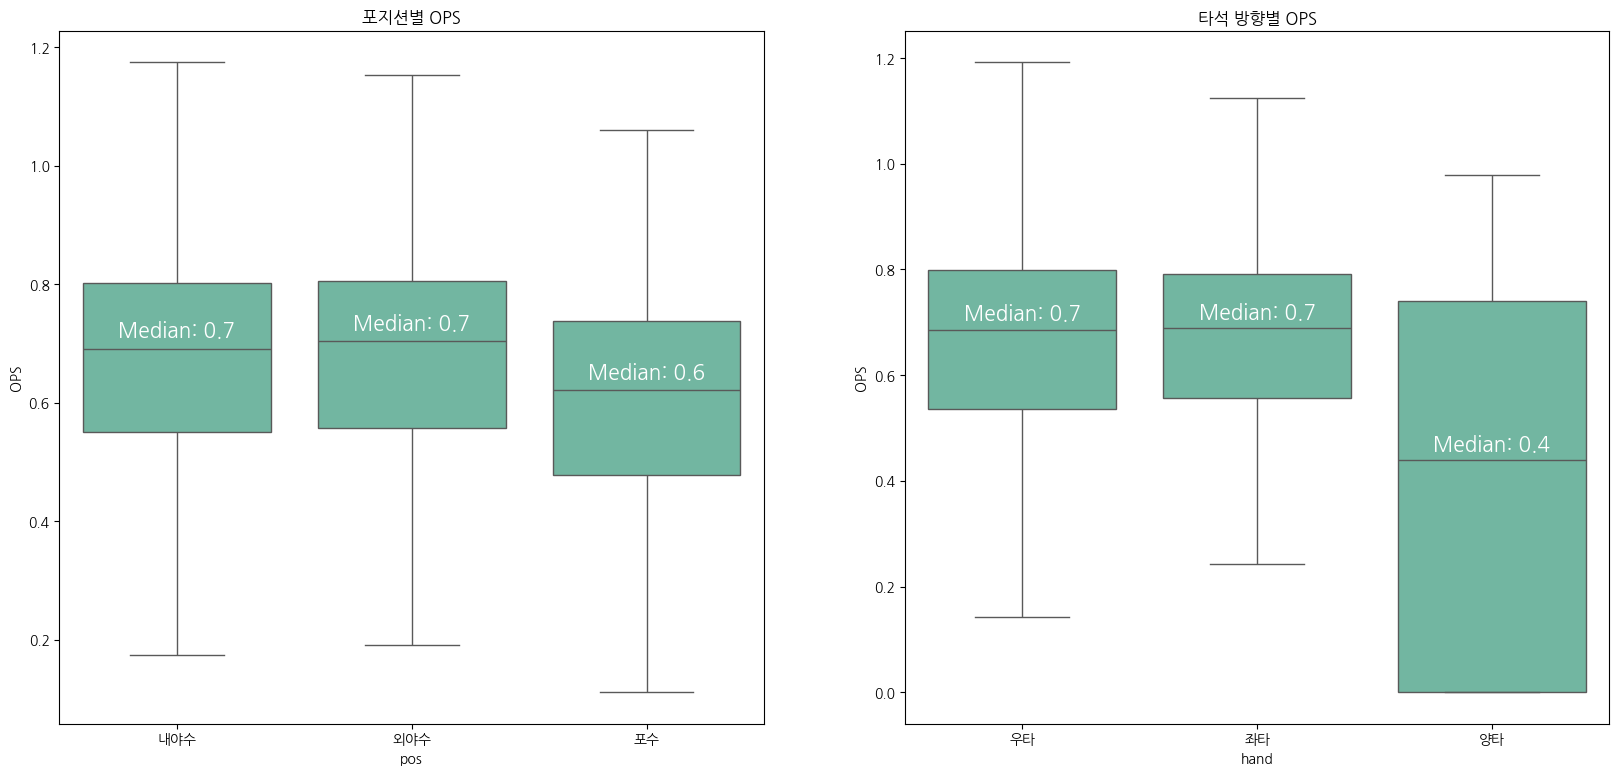

In [5]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)

# 포지션별 OPS
ax = sns.boxplot(x='pos', y='OPS', data=regular_season, showfliers = False)
plt.title('포지션별 OPS')
# 포지션별 중앙값
median = regular_season.groupby('pos')['OPS'].median().to_dict()

# 박스 중앙에 글자 표시
for patch in ax.get_xticklabels():
    ax.text(patch.get_text(), median[patch.get_text()] + 0.03, f'Median: {median[patch.get_text()]:.1f}', 
            ha='center', va='center', fontsize=15, color='white')


plt.subplot(1,2,2)
ax = sns.boxplot(x='hand', y = 'OPS', data = regular_season, showfliers = False)
plt.title('타석 방향별 OPS')
# 타석 방향별 중앙값
median = regular_season.groupby('hand')['OPS'].median().to_dict()

# 박스 중앙에 글자 표시
for patch in ax.get_xticklabels():
    ax.text(patch.get_text(), median[patch.get_text()] + 0.03, f'Median: {median[patch.get_text()]:.1f}', 
            ha='center', va='center', fontsize=15, color='white')
    

plt.show()
